<a href="https://colab.research.google.com/github/Lydia061003/Wu/blob/main/%E6%81%86%E7%94%9F%E6%9C%9F%E8%B2%A8%E8%B7%A8%E5%95%86%E5%93%81%E5%A5%97%E5%88%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time
from google.colab import files

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf
plt.style.use('seaborn')

<ipython-input-9-93769e679063>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
!pip install --upgrade pandas_datareader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/CTA')
os.listdir()
#df = pd.read_csv('TWE_Futures_Day_Trade.txt', sep=";", parse_dates=False)

Mounted at /content/drive


['HKFE.HSI HOT-Minute-Trade.txt',
 'settlement_date.csv',
 'btc_outsample.csv',
 'BTC_insmaple_data.csv',
 'TXF_樣本外.csv',
 'TWF_Futures_Minute_Trade.txt',
 '台指期 CTA 回測框架(教材版)_沒有到期日.ipynb',
 '台指期 CTA 回測框架(教材版).ipynb',
 'HKFE.HTI HOT-Minute-Trade.txt',
 '恆生科技期回測框架_不考慮到期日.ipynb',
 '恆生期回測框架_不考慮到期日.ipynb']

In [ ]:
#files.upload()

In [ ]:
df = pd.read_csv('HKFE.HTI HOT-Minute-Trade.txt')
ef = pd.read_csv('HKFE.HSI HOT-Minute-Trade.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date','Time'])
df.columns = ['open', 'high', 'low', 'close', 'volume']
df['Hour'] = df.index.map(lambda x: x.hour)
df.head(3)

,open,high,low,close,volume,Hour
2021-12-01 09:52:00,6082.0,6085.0,6077.0,6082.0,179,9
2021-12-01 09:53:00,6082.0,6091.0,6081.0,6090.0,245,9
2021-12-01 09:54:00,6090.0,6096.0,6089.0,6093.0,219,9


In [ ]:
ef.index = pd.to_datetime(ef['Date'] + ' ' + ef['Time'])
ef = ef.drop(columns=['Date','Time'])
ef.columns = ['open', 'high', 'low', 'close', 'volume']
ef['Hour'] = ef.index.map(lambda x: x.hour)
ef.head(3)

,open,high,low,close,volume,Hour
2021-12-01 09:16:00,23509.0,23509.0,23440.0,23473.0,1614,9
2021-12-01 09:17:00,23473.0,23526.0,23472.0,23526.0,743,9
2021-12-01 09:18:00,23528.0,23551.0,23521.0,23543.0,552,9


### 觀察資料

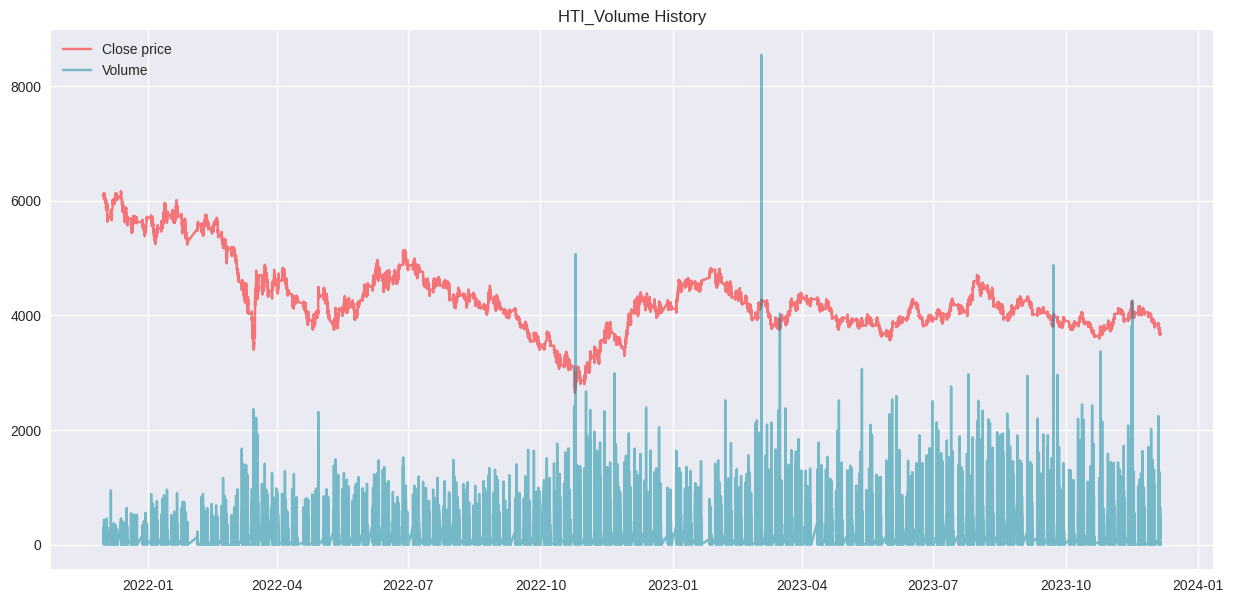

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(df['close'], color = 'red', alpha = 0.5, label = 'Close price')
plt.plot(df['volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend(loc='upper left')
plt.title('HTI_Volume History');

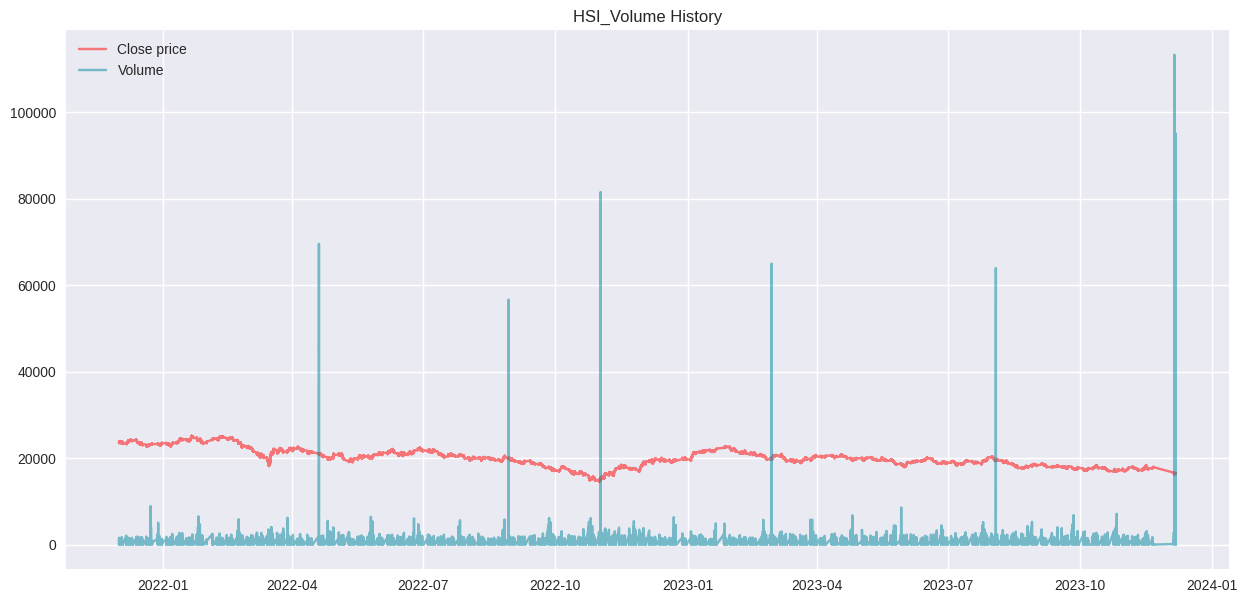

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(ef['close'], color = 'red', alpha = 0.5, label = 'Close price')
plt.plot(ef['volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend(loc='upper left')
plt.title('HSI_Volume History');

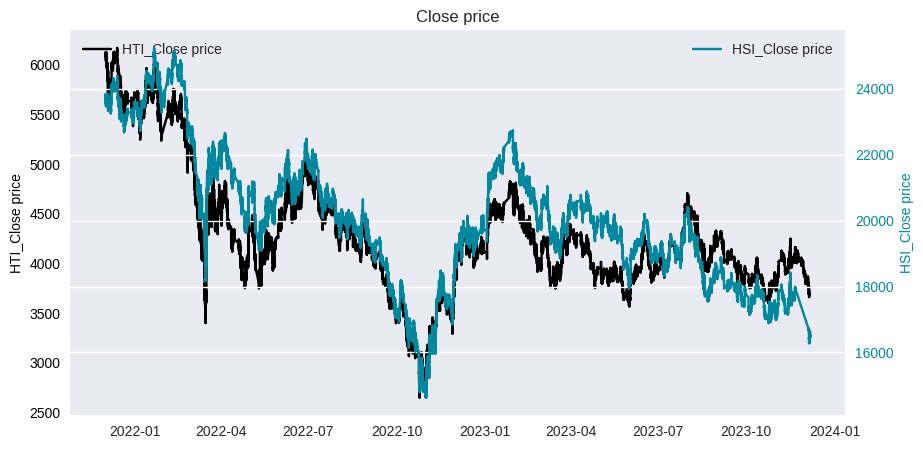

In [ ]:
#plt.figure(figsize = (15,7))
#plt.plot(df['close'], color = 'red', alpha = 0.5, label = 'HTI_Close price')
#plt.plot(ef['close'], color = '#01889f', alpha = 0.5, label = 'HSI_Close price')
#plt.legend(loc='upper left')
#plt.title('Close price');
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df['close'],color='black',label='HTI_Close price')
ax.set_ylabel('HTI_Close price',color='black',fontsize=10)
ax.tick_params(axis='y',labelcolor='black')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(ef['close'],color='#01889f',label='HSI_Close price')
ax2.set_ylabel('HSI_Close price',color='#01889f',fontsize=10)
ax2.tick_params(axis='y',labelcolor='#01889f')
ax2.legend(loc='upper right')

plt.title('Close price')

plt.show()

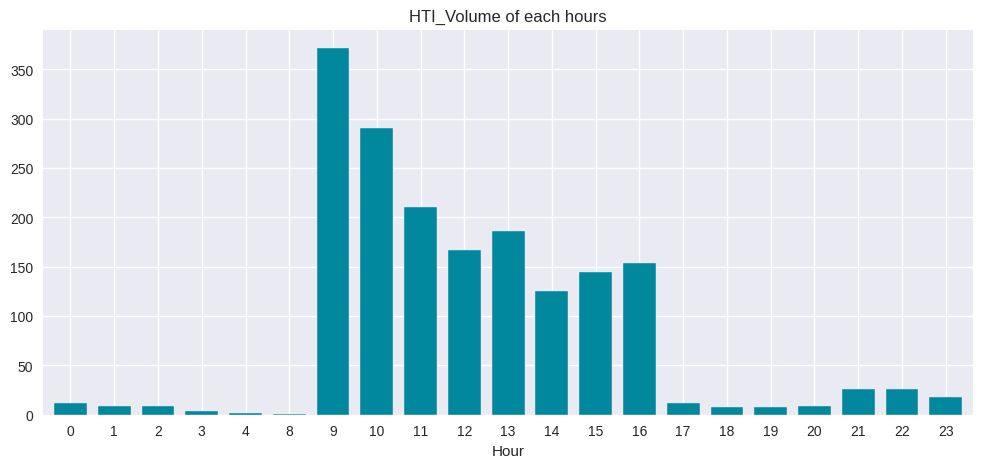

In [ ]:
data_df = df[(df.index >= '2021-01-01 00:00:00')].copy()
plt.figure(figsize = (12,5))
data_df.groupby(['Hour'])['volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation = 0)
plt.title('HTI_Volume of each hours');

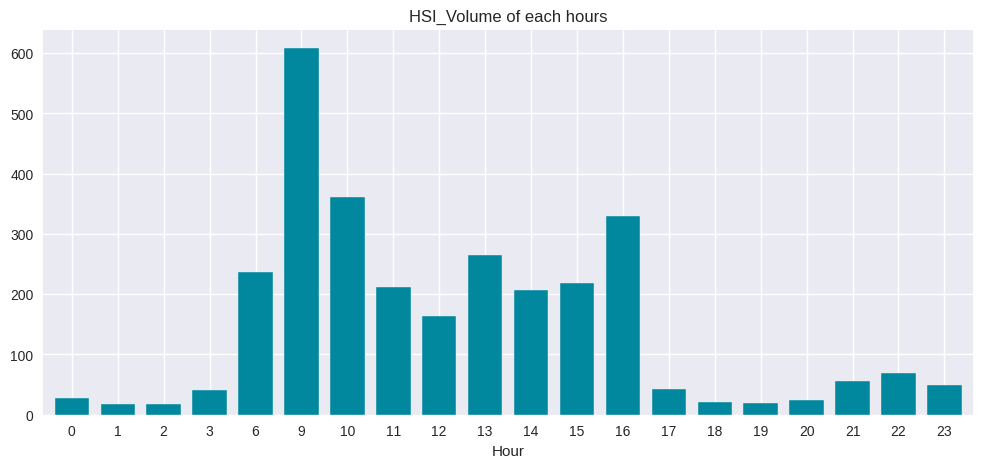

In [ ]:
data_ef = ef[(ef.index >= '2021-01-01 00:00:00')].copy()
plt.figure(figsize = (12,5))
data_ef.groupby(['Hour'])['volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation = 0)
plt.title('HSI_Volume of each hours');

In [ ]:
rule = '3T'
Morning_df = df[(df['Hour'] >= 8) & (df['Hour'] <= 13)]
Morning_df.index = Morning_df.index + dt.timedelta(minutes=15)
Morning_df.iloc[0:15]

,open,high,low,close,volume,Hour
2021-12-01 10:07:00,6082.0,6085.0,6077.0,6082.0,179,9
2021-12-01 10:08:00,6082.0,6091.0,6081.0,6090.0,245,9
2021-12-01 10:09:00,6090.0,6096.0,6089.0,6093.0,219,9
2021-12-01 10:10:00,6093.0,6093.0,6087.0,6092.0,159,9
2021-12-01 10:11:00,6092.0,6095.0,6085.0,6089.0,146,9
2021-12-01 10:12:00,6087.0,6091.0,6082.0,6090.0,160,9
2021-12-01 10:13:00,6090.0,6097.0,6090.0,6096.0,171,9
2021-12-01 10:14:00,6096.0,6098.0,6092.0,6092.0,132,9
2021-12-01 10:15:00,6092.0,6100.0,6092.0,6098.0,134,10
2021-12-01 10:16:00,6098.0,6098.0,6090.0,6091.0,150,10


In [ ]:
rule = '3T'
Morning_ef = ef[(ef['Hour'] >= 8) & (ef['Hour'] <= 13)]
Morning_ef.index = Morning_ef.index + dt.timedelta(minutes=15)
Morning_ef.iloc[0:15]

,open,high,low,close,volume,Hour
2021-12-01 09:31:00,23509.0,23509.0,23440.0,23473.0,1614,9
2021-12-01 09:32:00,23473.0,23526.0,23472.0,23526.0,743,9
2021-12-01 09:33:00,23528.0,23551.0,23521.0,23543.0,552,9
2021-12-01 09:34:00,23541.0,23575.0,23537.0,23572.0,427,9
2021-12-01 09:35:00,23573.0,23586.0,23566.0,23579.0,313,9
2021-12-01 09:36:00,23576.0,23584.0,23568.0,23579.0,290,9
2021-12-01 09:37:00,23578.0,23595.0,23562.0,23562.0,397,9
2021-12-01 09:38:00,23561.0,23567.0,23532.0,23533.0,508,9
2021-12-01 09:39:00,23536.0,23556.0,23535.0,23548.0,311,9
2021-12-01 09:40:00,23550.0,23557.0,23541.0,23546.0,241,9


In [ ]:
# 確認 9:03 及 9:06 的 open 是 9:01 及 9:04 的 open
Morning_df.resample(rule=rule, closed='right', label='right').last()[['close']].iloc[0:3]

,close
2021-12-01 10:09:00,6093.0
2021-12-01 10:12:00,6090.0
2021-12-01 10:15:00,6098.0


In [ ]:
Morning_ef.resample(rule=rule, closed='right', label='right').last()[['close']].iloc[0:3]

,close
2021-12-01 09:33:00,23543.0
2021-12-01 09:36:00,23579.0
2021-12-01 09:39:00,23548.0


In [ ]:
# label='left' => 時間轉為左側時間
Morning_df.resample(rule=rule, closed='left', label='left').last()[['close']].iloc[0:3]

,close
2021-12-01 10:06:00,6090.0
2021-12-01 10:09:00,6089.0
2021-12-01 10:12:00,6092.0


In [ ]:
Morning_ef.resample(rule=rule, closed='left', label='left').last()[['close']].iloc[0:3]

,close
2021-12-01 09:30:00,23526.0
2021-12-01 09:33:00,23579.0
2021-12-01 09:36:00,23533.0


In [ ]:
rule = '60T'

Morning_df = df[(df['Hour'] >= 9) & (df['Hour'] <= 16)]
Morning_df.index = Morning_df.index + dt.timedelta(minutes=15)

d1 = Morning_df.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Morning_df.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Morning_df.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Morning_df.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Morning_df.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Morning_df = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Morning_df = df_Morning_df.dropna()
df_Morning_df.index = df_Morning_df.index - dt.timedelta(minutes=15)
df_Morning_df.head()

,open,high,low,close,volume
2021-12-01 09:45:00,6082.0,6123.0,6077.0,6105.0,9589
2021-12-01 10:45:00,6105.0,6119.0,6091.0,6096.0,7332
2021-12-01 11:45:00,6096.0,6108.0,6096.0,6108.0,5591
2021-12-01 12:45:00,6108.0,6130.0,6085.0,6088.0,5378
2021-12-01 13:45:00,6090.0,6104.0,6073.0,6096.0,1229


In [ ]:
rule = '60T'

Morning_ef = ef[(ef['Hour'] >= 9) & (ef['Hour'] <= 16)]
Morning_ef.index = Morning_ef.index + dt.timedelta(minutes=15)

e1 = Morning_ef.resample(rule=rule, closed='right', label='left').first()[['open']]
e2 = Morning_ef.resample(rule=rule, closed='right', label='left').max()[['high']]
e3 = Morning_ef.resample(rule=rule, closed='right', label='left').min()[['low']]
e4 = Morning_ef.resample(rule=rule, closed='right', label='left').last()[['close']]
e5 = Morning_ef.resample(rule=rule, closed='right', label='left').sum()[['volume']]

ef_Morning_ef = pd.concat([e1,e2,e3,e4,e5], axis=1)
ef_Morning_ef = ef_Morning_ef.dropna()
ef_Morning_ef.index = ef_Morning_ef.index - dt.timedelta(minutes=15)
ef_Morning_ef.head()

,open,high,low,close,volume
2021-12-01 08:45:00,23509.0,23730.0,23440.0,23722.0,18345
2021-12-01 09:45:00,23723.0,23838.0,23679.0,23781.0,27886
2021-12-01 10:45:00,23781.0,23831.0,23756.0,23760.0,9453
2021-12-01 11:45:00,23760.0,23794.0,23760.0,23787.0,1587
2021-12-01 12:45:00,23813.0,23871.0,23697.0,23718.0,9433


In [ ]:
rule = '60T'

Night_df = df[(df['Hour'] < 3) | (df['Hour'] > 18)]

d1 = Night_df.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Night_df.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Night_df.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Night_df.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Night_df.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Night_df = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Night_df = df_Night_df.dropna()
df_Night_df.head()

,open,high,low,close,volume
2021-12-01 19:00:00,6065.0,6087.0,6065.0,6087.0,91
2021-12-01 20:00:00,6085.0,6088.0,6070.0,6070.0,19
2021-12-01 21:00:00,6060.0,6077.0,6052.0,6077.0,38
2021-12-01 22:00:00,6078.0,6078.0,6035.0,6053.0,97
2021-12-01 23:00:00,6065.0,6108.0,6065.0,6106.0,124


In [ ]:
rule = '60T'

Night_ef = ef[(ef['Hour'] < 3) | (ef['Hour'] > 18)]

e1 = Night_ef.resample(rule=rule, closed='right', label='left').first()[['open']]
e2 = Night_ef.resample(rule=rule, closed='right', label='left').max()[['high']]
e3 = Night_ef.resample(rule=rule, closed='right', label='left').min()[['low']]
e4 = Night_ef.resample(rule=rule, closed='right', label='left').last()[['close']]
e5 = Night_ef.resample(rule=rule, closed='right', label='left').sum()[['volume']]

ef_Night_ef = pd.concat([e1,e2,e3,e4,e5], axis=1)
ef_Night_ef = ef_Night_ef.dropna()
ef_Night_ef.head()

,open,high,low,close,volume
2021-12-01 18:00:00,23643.0,23645.0,23642.0,23645.0,9
2021-12-01 19:00:00,23647.0,23723.0,23628.0,23711.0,1360
2021-12-01 20:00:00,23710.0,23724.0,23675.0,23677.0,1398
2021-12-01 21:00:00,23678.0,23685.0,23634.0,23677.0,1481
2021-12-01 22:00:00,23675.0,23691.0,23609.0,23651.0,3375


In [ ]:
df_Day = pd.concat([df_Morning_df, df_Night_df], axis=0)
df_Day = df_Day.sort_index(ascending=True)
df_Day.head()

,open,high,low,close,volume
2021-12-01 09:45:00,6082.0,6123.0,6077.0,6105.0,9589
2021-12-01 10:45:00,6105.0,6119.0,6091.0,6096.0,7332
2021-12-01 11:45:00,6096.0,6108.0,6096.0,6108.0,5591
2021-12-01 12:45:00,6108.0,6130.0,6085.0,6088.0,5378
2021-12-01 13:45:00,6090.0,6104.0,6073.0,6096.0,1229


In [ ]:
ef_Day = pd.concat([ef_Morning_ef, ef_Night_ef], axis=0)
ef_Day = ef_Day.sort_index(ascending=True)
ef_Day.head()

,open,high,low,close,volume
2021-12-01 08:45:00,23509.0,23730.0,23440.0,23722.0,18345
2021-12-01 09:45:00,23723.0,23838.0,23679.0,23781.0,27886
2021-12-01 10:45:00,23781.0,23831.0,23756.0,23760.0,9453
2021-12-01 11:45:00,23760.0,23794.0,23760.0,23787.0,1587
2021-12-01 12:45:00,23813.0,23871.0,23697.0,23718.0,9433


In [ ]:
# ### 特例：日K處理 ###
# day = df.loc['2017-5-15':].copy()
# df_day.index = df_day.index - dt.timedelta(hours=8)

# d1 = df_day.resample(rule='1D', closed='right', label='left').first()[['open']]
# d2 = df_day.resample(rule='1D', closed='right', label='left').max()[['high']]
# d3 = df_day.resample(rule='1D', closed='right', label='left').min()[['low']]
# d4 = df_day.resample(rule='1D', closed='right', label='left').last()[['close']]
# d5 = df_day.resample(rule='1D', closed='right', label='left').sum()[['volume']]

# df_day = pd.concat([d1,d2,d3,d4,d5], axis=1)
# df_day = df_day.dropna()
# df_day.index = df_day.index + dt.timedelta(days=1) ##回測時結算日也要加一天
# df_day.tail()

### 選擇回測資料

In [ ]:
# df_Morning['Month'] = df_Morning.index.map(lambda x: x.month)
# df_Morning['Weekday'] = df_Morning.index.map(lambda x: x.weekday)+1
df_Morning_df['Hour'] = df_Morning_df.index.map(lambda x: x.hour)

In [ ]:
trainData_df = df_Morning_df[(df_Morning_df.index >= '2021-01-01 00:00:00') & (df_Morning_df.index <= '2022-12-31 00:00:00')].copy()
testData_df = df_Morning_df[(df_Morning_df.index >= '2023-01-01 00:00:00') & (df_Morning_df.index <= '2023-08-25 00:00:00')].copy()

In [ ]:
trainData_df.head(3)

,open,high,low,close,volume,Hour,MA,STD,upLine,downLine
2021-12-01 09:45:00,6082.0,6123.0,6077.0,6105.0,9589,9,NaN,NaN,NaN,NaN
2021-12-01 10:45:00,6105.0,6119.0,6091.0,6096.0,7332,10,NaN,NaN,NaN,NaN
2021-12-01 11:45:00,6096.0,6108.0,6096.0,6108.0,5591,11,NaN,NaN,NaN,NaN


In [ ]:
testData_df.tail(3)

,open,high,low,close,volume,Hour
2023-08-24 13:45:00,4155.0,4171.0,4145.0,4164.0,9758,13
2023-08-24 14:45:00,4165.0,4167.0,4148.0,4160.0,10546,14
2023-08-24 15:45:00,4160.0,4168.0,4157.0,4160.0,12471,15


In [ ]:
#參數設定
fund = 1000000
feePaid = 600
length = 15
NumStd = 1.5
K = 0.04

#指標計算
# trainData['H'] = trainData['high'].shift(1).rolling(window=length, center=False).max()
# trainData['L'] = trainData['low'].shift(1).rolling(window=length, center=False).min()
trainData_df['MA'] = trainData_df['close'].rolling(window=length, center=False).mean()
trainData_df['STD'] = trainData_df['close'].rolling(window=length, center=False).std()
trainData_df['upLine'] = trainData_df['MA'] + NumStd*trainData_df['STD']
trainData_df['downLine'] = trainData_df['MA'] - NumStd*trainData_df['STD']

trainData_df.tail(3)

,open,high,low,close,volume,Hour,MA,STD,upLine,downLine
2022-12-30 13:45:00,4159.0,4166.0,4149.0,4158.0,4167,13,4152.400000,38.325299,4209.887949,4094.912051
2022-12-30 14:45:00,4157.0,4169.0,4147.0,4151.0,4633,14,4146.200000,28.782931,4189.374397,4103.025603
2022-12-30 15:45:00,4150.0,4168.0,4142.0,4166.0,6423,15,4148.066667,29.119131,4191.745364,4104.387970


In [ ]:
trainData_ef = ef_Morning_ef[(ef_Morning_ef.index >= '2021-01-01 00:00:00') & (ef_Morning_ef.index <= '2022-12-31 00:00:00')].copy()
testData_ef = ef_Morning_ef[(ef_Morning_ef.index >= '2023-01-01 00:00:00') & (ef_Morning_ef.index <= '2023-12-06 00:00:00')].copy()
trainData_ef.head(3)

,open,high,low,close,volume
2021-12-01 08:45:00,23509.0,23730.0,23440.0,23722.0,18345
2021-12-01 09:45:00,23723.0,23838.0,23679.0,23781.0,27886
2021-12-01 10:45:00,23781.0,23831.0,23756.0,23760.0,9453


In [ ]:
testData_ef.tail(3)

,open,high,low,close,volume
2023-12-05 14:45:00,16308.0,16347.0,16271.0,16337.0,16780
2023-12-05 15:45:00,16337.0,16402.0,16329.0,16372.0,13019
2023-12-05 16:45:00,16372.0,16372.0,16372.0,16372.0,113238


In [ ]:
#參數設定
fund = 1000000
feePaid = 600
length = 15
NumStd = 1.5
K = 0.04

#指標計算
# trainData['H'] = trainData['high'].shift(1).rolling(window=length, center=False).max()
# trainData['L'] = trainData['low'].shift(1).rolling(window=length, center=False).min()
trainData_ef['MA'] = trainData_ef['close'].rolling(window=length, center=False).mean()
trainData_ef['STD'] = trainData_ef['close'].rolling(window=length, center=False).std()
trainData_ef['upLine'] = trainData_ef['MA'] + NumStd*trainData_ef['STD']
trainData_ef['downLine'] = trainData_ef['MA'] - NumStd*trainData_ef['STD']

trainData_ef.tail(3)

,open,high,low,close,volume,MA,STD,upLine,downLine
2022-12-30 13:45:00,19922.0,19956.0,19884.0,19932.0,6304,19866.533333,118.245427,20043.901473,19689.165193
2022-12-30 14:45:00,19930.0,19960.0,19885.0,19898.0,7059,19858.200000,110.587522,20024.081283,19692.318717
2022-12-30 15:45:00,19895.0,19921.0,19844.0,19915.0,9825,19871.866667,103.397891,20026.963503,19716.769831


In [ ]:
df_arr = np.array(trainData_df)
time_arr = np.array(trainData_df.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

#翻譯蒟蒻
# date_arr = []
# for i in time_arr:
#     date_arr.append(pd.to_datetime(i).date())

In [ ]:
ef_arr = np.array(trainData_ef)
time_arr = np.array(trainData_ef.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

### 做空

sell short at 2021-12-03T12:45:00.000000000
buytocover at 2021-12-23T12:45:00.000000000
trade completed

sell short at 2021-12-23T15:45:00.000000000
buytocover at 2021-12-30T09:45:00.000000000
trade completed

sell short at 2021-12-30T12:45:00.000000000
buytocover at 2021-12-30T14:45:00.000000000
trade completed

sell short at 2021-12-31T08:45:00.000000000
buytocover at 2022-01-04T11:45:00.000000000
trade completed

sell short at 2022-01-04T12:45:00.000000000
buytocover at 2022-01-12T10:45:00.000000000
trade completed

sell short at 2022-01-12T12:45:00.000000000
buytocover at 2022-01-13T12:45:00.000000000
trade completed

sell short at 2022-01-13T15:45:00.000000000
buytocover at 2022-01-28T08:45:00.000000000
trade completed

sell short at 2022-02-04T12:45:00.000000000
buytocover at 2022-02-22T12:45:00.000000000
trade completed

sell short at 2022-02-23T12:45:00.000000000
buytocover at 2022-02-25T08:45:00.000000000
trade completed

sell short at 2022-02-28T12:45:00.000000000
buytocover 

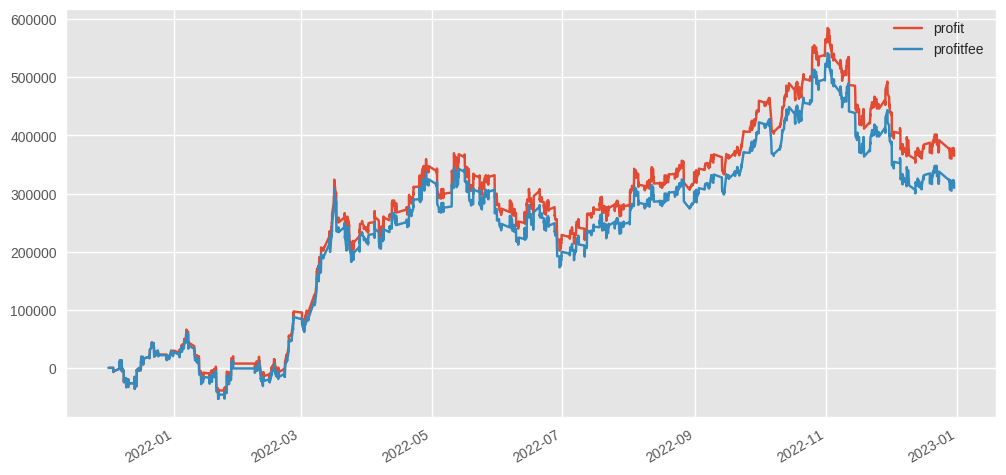

In [ ]:
BS = None
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):

    if i == len(df_arr)-1:
        break

    ## 進場邏輯 恆生期走空且恆生科相對恆生期走強，進場做空恆生期
    entrySellShort = ef_arr[i,4] < ef_arr[i,7] and df_arr[i,4] > ef_arr[i,4]
    #entryCondition = date_arr[i] #not in settlementDate

    ## 出場邏輯 恆生科收盤價<恆生科MA，出場
    exitBuyToCover = df_arr[i,4] <= df_arr[i,7]
    #exitCondition = date_arr[i] and df_arr[i,5] >= 11 #in settlementDate and df_arr[i,5] >= 11

    if BS == 'S':
        stopLoss = ef_arr[i,3] >= ef_arr[t,0] * (1+K)
        stopProfit = ef_arr[i,3] <= ef_arr[t,0] * (1-K)

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entrySellShort: #and entryCondition:
            BS = 'S'
            t = i+1
            sellshort.append(t)
            print("sell short at {}".format(time_arr[t]))


    elif BS == 'S':
        profit = 50 * (ef_arr[i,0] - ef_arr[i+1,0])
        profit_list.append(profit)

        if exitBuyToCover or i == len(ef_arr)-2 or stopLoss or stopProfit: #exitCondition or stopLoss or stopProfit:
            pl_round = 50 * (ef_arr[t,0] - ef_arr[i+1,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS = None
            print("buytocover at {}".format(time_arr[i+1]))
            print("trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData_df.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6));

In [ ]:
print(equity)

                       profit  profitfee
2021-12-01 09:45:00       0.0        0.0
2021-12-01 10:45:00       0.0        0.0
2021-12-01 11:45:00       0.0        0.0
2021-12-01 12:45:00       0.0        0.0
2021-12-01 13:45:00       0.0        0.0
2021-12-01 14:45:00       0.0        0.0
2021-12-01 15:45:00       0.0        0.0
2021-12-02 08:45:00       0.0        0.0
2021-12-02 09:45:00       0.0        0.0
2021-12-02 10:45:00       0.0        0.0
2021-12-02 11:45:00       0.0        0.0
2021-12-02 12:45:00       0.0        0.0
2021-12-02 13:45:00       0.0        0.0
2021-12-02 14:45:00       0.0        0.0
2021-12-02 15:45:00       0.0        0.0
2021-12-03 08:45:00       0.0        0.0
2021-12-03 09:45:00       0.0        0.0
2021-12-03 10:45:00       0.0        0.0
2021-12-03 11:45:00       0.0        0.0
2021-12-03 12:45:00       0.0        0.0
2021-12-03 13:45:00       0.0        0.0
2021-12-03 14:45:00   -7200.0    -7200.0
2021-12-03 15:45:00   -5950.0    -5950.0
2021-12-06 08:45

**績效呈現**\
1.基本指標\
2.時間損益\
3.損益分布\
4.quantstat套件

In [ ]:
import seaborn as sns
import matplotlib.pyplot as py
plt.style.use('ggplot')

In [ ]:
print(equity)

                       profit  profitfee     equity  drawdown_percent  \
2021-12-01 09:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 10:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 11:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 12:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 13:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 14:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-01 15:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 08:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 09:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 10:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 11:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 12:45:00       0.0        0.0  1000000.0          0.000000   
2021-12-02 13:45:00       0.0        0.0  1000000.0

In [ ]:
equity['equity'] = equity['profit'] + fund
equity['drawdown_percent'] = (equity['equity']/equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax() #前n個元素的最大值
#print(profit_fee_list_realized)
profit = equity['profit'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(sellshort)#len(buy) + len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i>0]) / abs(sum([i for i in profit_fee_list_realized if i<0]))

print('Profit : ',profit)
print('Return : ',ret)
print('Max DrawDown : ',mdd)
print('Caimar Ratio : ',calmarRatio)
print('Trade Times : ',tradeTimes)
print('Win Rate : ',winRate)
print('Profit Factor : ',profitFactor)

Profit :  364900.0
Return :  0.3649
Max DrawDown :  0.1463406940063091
Caimar Ratio :  2.493496443198966
Trade Times :  47
Win Rate :  0.5652173913043478
Profit Factor :  1.4177856947108798


In [ ]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity']/equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax() #前n個元素的最大值
#print(profit_fee_list_realized)
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(sellshort)#len(buy) + len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i>0]) / abs(sum([i for i in profit_fee_list_realized if i<0]))

print('Profit : ',profit)
print('Return : ',ret)
print('Max DrawDown : ',mdd)
print('Caimar Ratio : ',calmarRatio)
print('Trade Times : ',tradeTimes)
print('Win Rate : ',winRate)
print('Profit Factor : ',profitFactor)

Profit :  309700.0
Return :  0.3097000000000001
Max DrawDown :  0.15666753145673884
Caimar Ratio :  1.9767975988408206
Trade Times :  47
Win Rate :  0.5652173913043478
Profit Factor :  1.4177856947108798


2021-12-01 10:45:00    0.000000
2021-12-01 11:45:00    0.000000
2021-12-01 12:45:00    0.000000
2021-12-01 13:45:00    0.000000
2021-12-01 14:45:00    0.000000
2021-12-01 15:45:00    0.000000
2021-12-02 08:45:00    0.000000
2021-12-02 09:45:00    0.000000
2021-12-02 10:45:00    0.000000
2021-12-02 11:45:00    0.000000
2021-12-02 12:45:00    0.000000
2021-12-02 13:45:00    0.000000
2021-12-02 14:45:00    0.000000
2021-12-02 15:45:00    0.000000
2021-12-03 08:45:00    0.000000
2021-12-03 09:45:00    0.000000
2021-12-03 10:45:00    0.000000
2021-12-03 11:45:00    0.000000
2021-12-03 12:45:00    0.000000
2021-12-03 13:45:00    0.000000
2021-12-03 14:45:00   -0.007200
2021-12-03 15:45:00    0.001259
2021-12-06 08:45:00    0.004125
2021-12-06 09:45:00    0.011822
2021-12-06 10:45:00   -0.003763
2021-12-06 11:45:00    0.000596
2021-12-06 12:45:00    0.000894
2021-12-06 13:45:00   -0.001340
2021-12-06 14:45:00    0.001391
2021-12-06 15:45:00    0.005309
2021-12-07 12:45:00   -0.000296
2021-12-

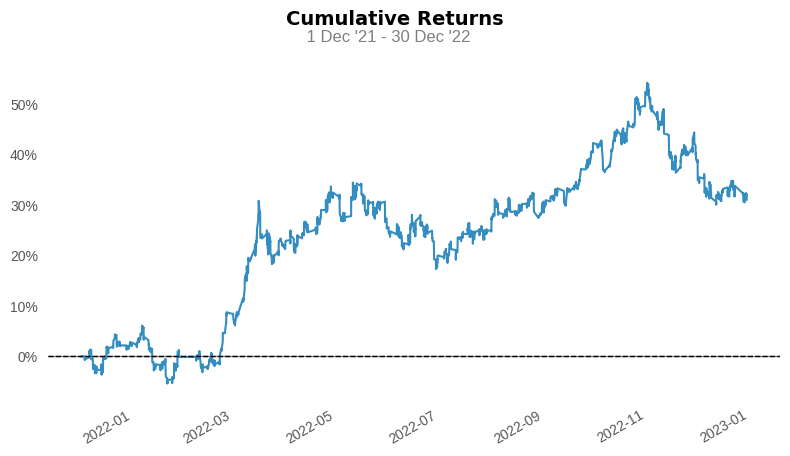

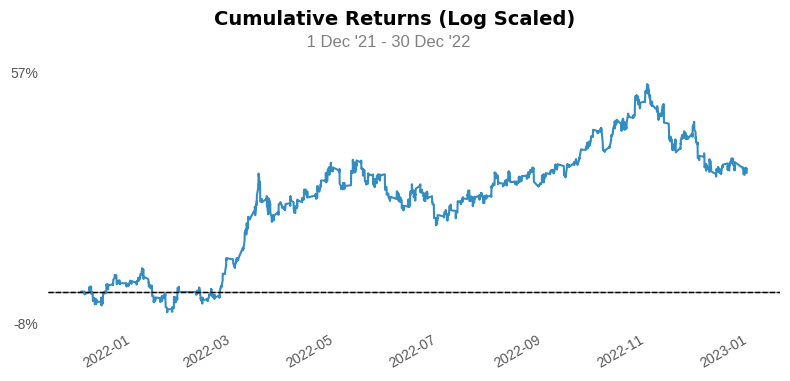

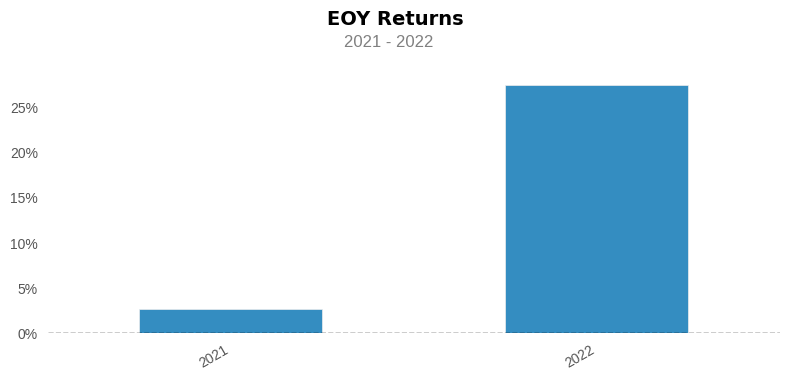

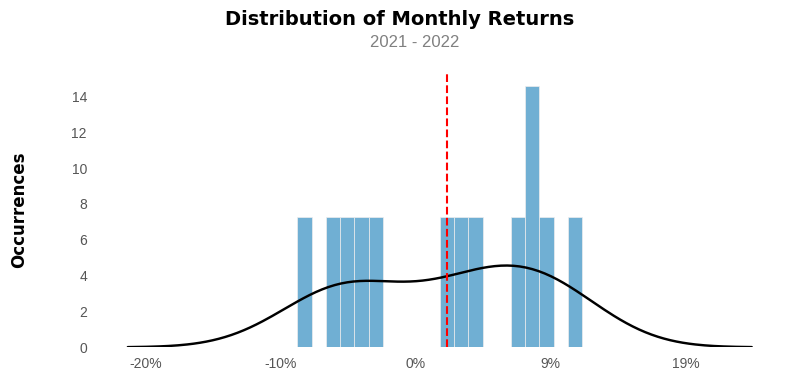

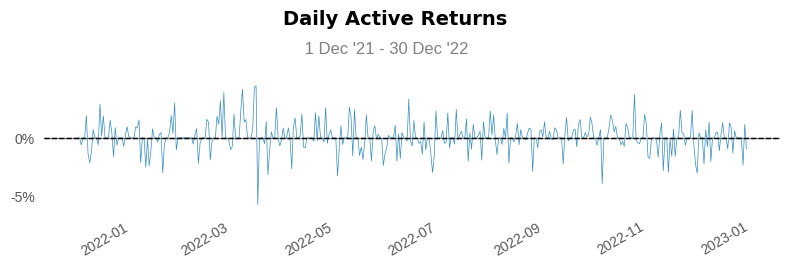

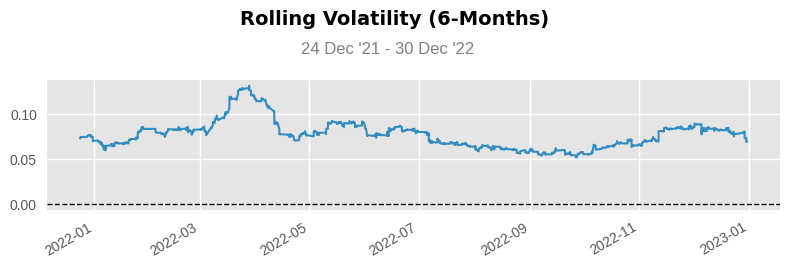

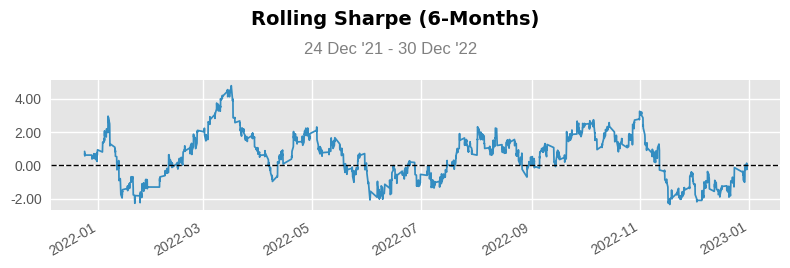

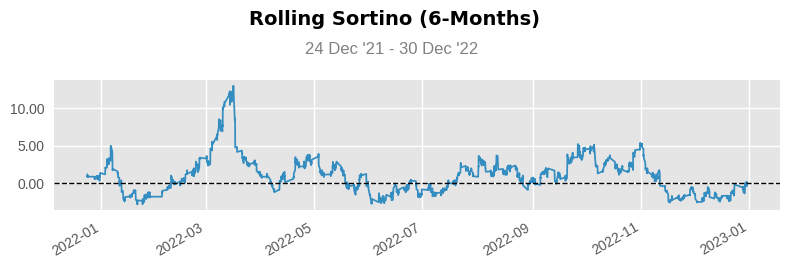

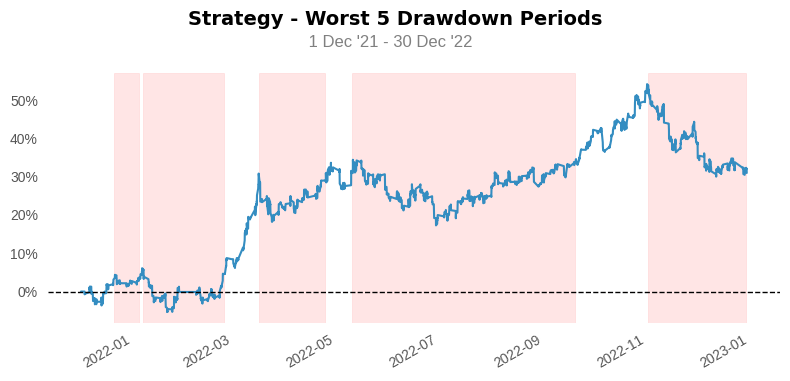

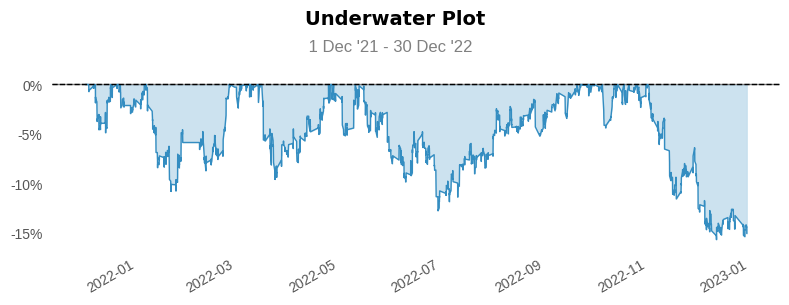

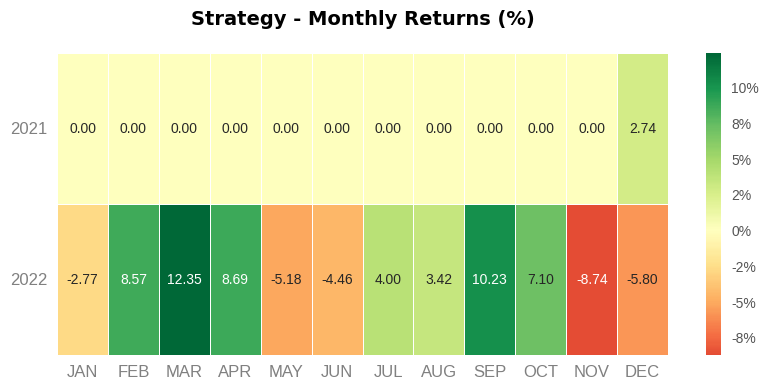

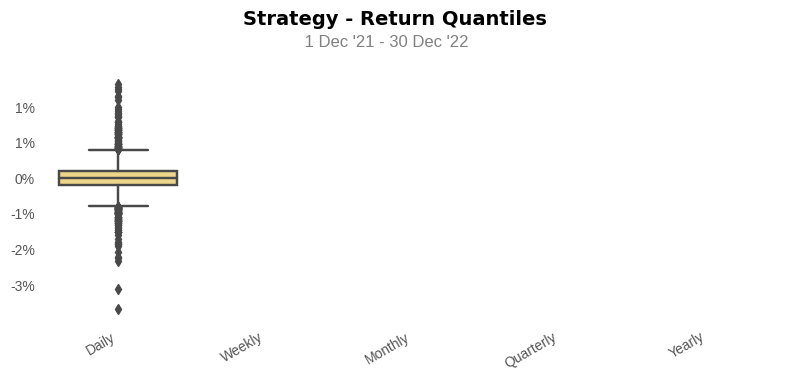

In [ ]:
# quantstats回測報表
!pip install quantstats
import quantstats
ret = equity['equity'].pct_change(periods=1).dropna()
print(ret)
quantstats.reports.full(ret)
#quantstats.reports.html(ret,output='stats.html',title='backtest result',download_filename='result.html')